## Assignment 1

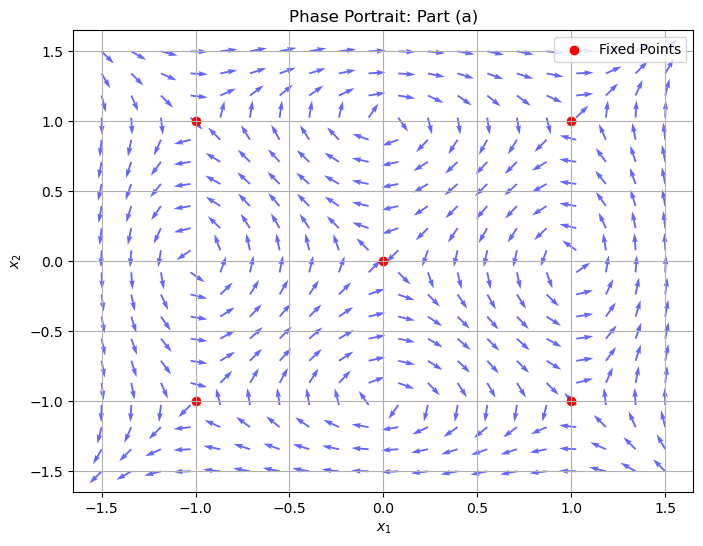

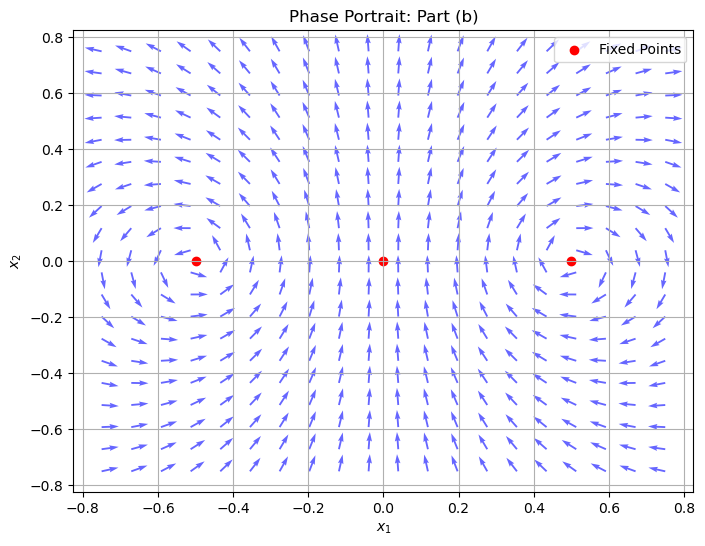

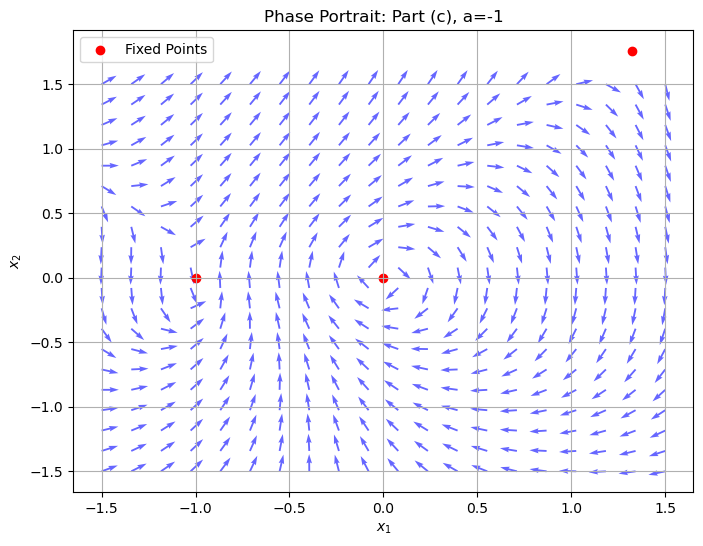

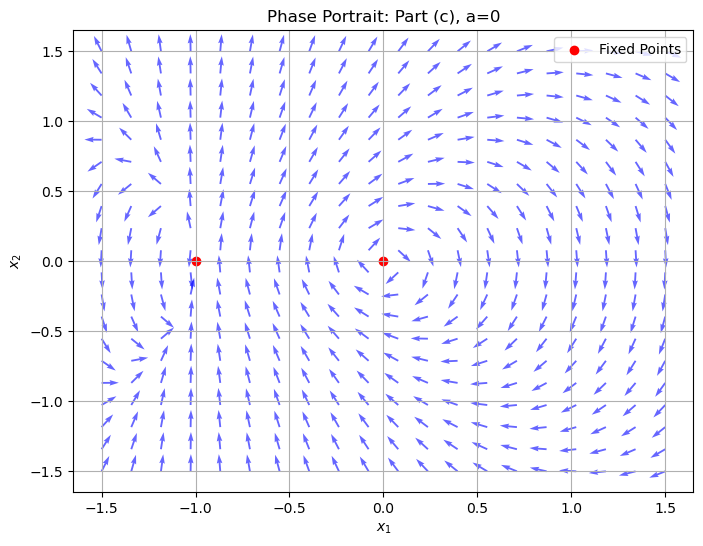

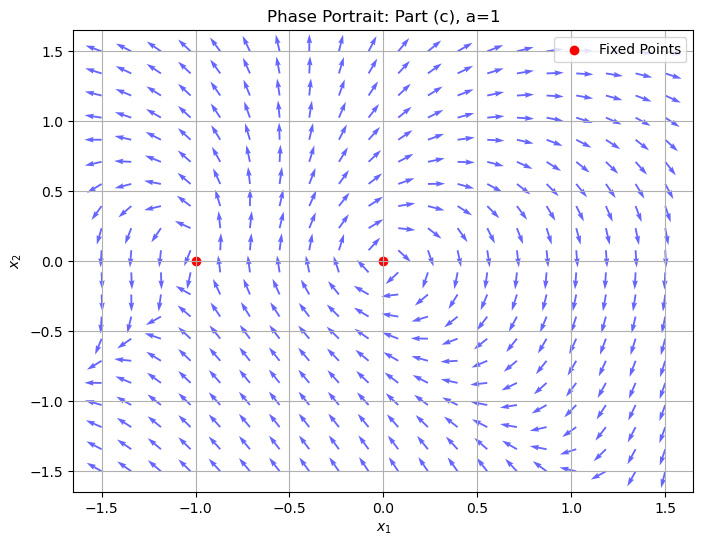

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Part (a): Define the system
def system_a(X):
    x1, x2 = X
    dx1 = -x2 + x2**3
    dx2 = -x1 + x1**3
    return np.array([dx1, dx2])

# Part (a): Jacobian of the system
def jacobian_a(X):
    x1, x2 = X
    return np.array([[0, -1 + 3 * x2**2],
                     [-1 + 3 * x1**2, 0]])

# Part (a): Solve for fixed points
def fixed_points_a():
    guesses = [(0, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    fixed_points = []
    for guess in guesses:
        sol = fsolve(system_a, guess)
        if not any(np.allclose(sol, fp) for fp in fixed_points):
            fixed_points.append(sol)
    return np.array(fixed_points)

fixed_points_a_vals = fixed_points_a()

# Part (b): Define the system
def system_b(X):
    x1, x2 = X
    dx1 = 2 * x1 * x2
    dx2 = 1 / 4 - x1**2 + x2**2
    return np.array([dx1, dx2])

# Part (b): Solve for fixed points
def fixed_points_b():
    guesses = [(0,0), (0, 0.5), (0, -0.5), (0.5, 0), (-0.5, 0)]
    fixed_points = []
    for guess in guesses:
        sol = fsolve(system_b, guess)
        sol = np.round(sol, decimals=5)  # Round for precision issues
        if not any(np.allclose(sol, fp) for fp in fixed_points):
            fixed_points.append(sol)
    return np.array(fixed_points)

fixed_points_b_vals = fixed_points_b()

# Part (c): Define the system for parametric analysis
def system_c(X, a):
    x1, x2 = X
    dx1 = x2 + x1 * x2 + a * x1 * x2**2
    dx2 = -x1 - x1**2 + x2**2
    return np.array([dx1, dx2])

# Function to plot phase portraits
def plot_phase_portrait(system, fixed_points, x_range, y_range, title, a=None):
    x = np.linspace(*x_range, 20)
    y = np.linspace(*y_range, 20)
    X1, X2 = np.meshgrid(x, y)
    DX1, DX2 = np.zeros_like(X1), np.zeros_like(X2)
    
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            if a is not None:  # If parameter 'a' is required
                dX = system([X1[i, j], X2[i, j]], a)
            else:  # Systems without 'a'
                dX = system([X1[i, j], X2[i, j]])
            DX1[i, j], DX2[i, j] = dX / np.linalg.norm(dX) if np.linalg.norm(dX) > 0 else (0, 0)
    
    plt.figure(figsize=(8, 6))
    plt.quiver(X1, X2, DX1, DX2, color='blue', alpha=0.6)
    plt.scatter(fixed_points[:, 0], fixed_points[:, 1], color='red', label='Fixed Points')
    plt.title(title)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.grid()
    plt.show()

# Plot results for part (a)
plot_phase_portrait(system_a, fixed_points_a_vals, (-1.5, 1.5), (-1.5, 1.5), "Phase Portrait: Part (a)")

# Plot results for part (b)
plot_phase_portrait(system_b, fixed_points_b_vals, (-0.75, 0.75), (-0.75, 0.75), "Phase Portrait: Part (b)")

# For part (c), we vary a and analyze
a_values = [-1, 0, 1]
for a in a_values:
    guesses = [(0, 0), (1, 1), (-1, -1)]  # Initial guesses for fixed points
    fixed_points_c = []
    for guess in guesses:
        sol = fsolve(system_c, guess, args=(a,))
        if not any(np.allclose(sol, fp) for fp in fixed_points_c):
            fixed_points_c.append(sol)
    fixed_points_c_vals = np.array(fixed_points_c)
    plot_phase_portrait(system_c, fixed_points_c_vals, (-1.5, 1.5), (-1.5, 1.5), f"Phase Portrait: Part (c), a={a}", a)


Fixed points for a = 1
[[ 0.  0.]
 [-1.  0.]]
Fixed points for a = 0
[[ 0.  0.]
 [-1.  0.]]
Fixed points for a = -1
[[ 0.  0.]
 [-1.  0.]]


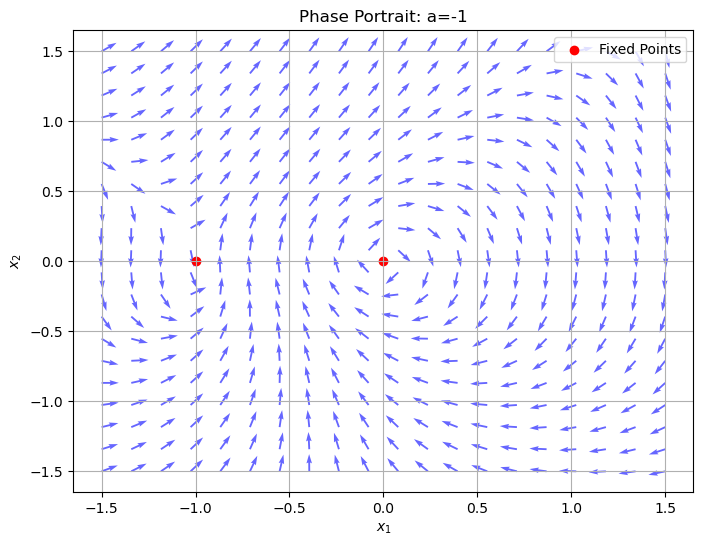

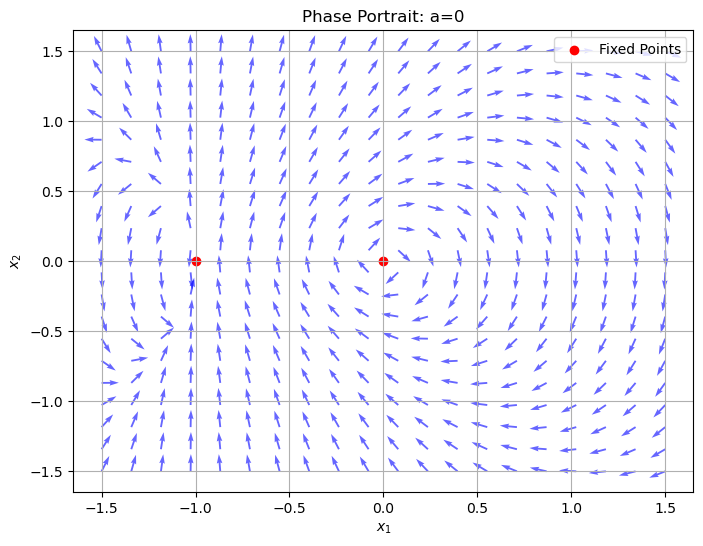

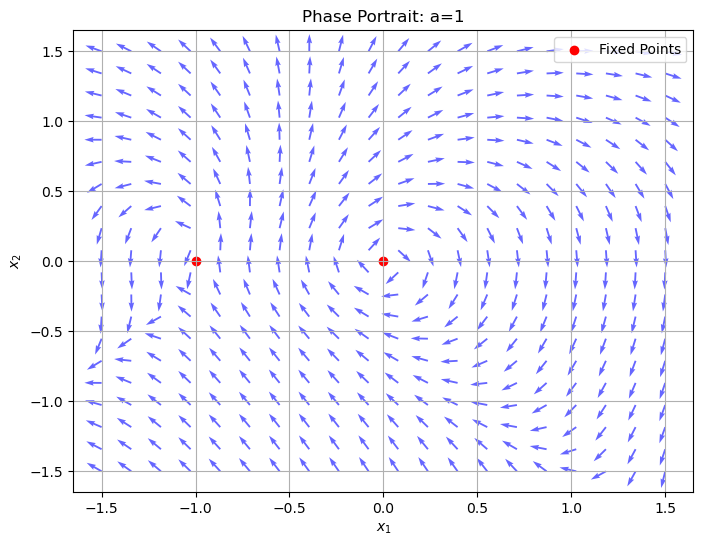

In [14]:
def system_c(X, a):
    x1, x2 = X
    dx1 = x2 + x1 * x2 + a * x1 * x2**2
    dx2 = -x1 - x1**2 + x2**2
    return [dx1, dx2]

# Solve for fixed points
def fixed_points_c(a):
    guesses = [(0, 0), (-1, 0), (0.5, 0.5), (-0.5, -0.5)]  # Initial guesses
    fixed_points = []
    for guess in guesses:
        sol = fsolve(system_c, guess, args=(a,))
        sol = np.round(sol, decimals=5)  # Round for numerical stability
        if not any(np.allclose(sol, fp) for fp in fixed_points):
            fixed_points.append(sol)
    return np.array(fixed_points)

# Example for a = 1
a = 1
fixed_points = fixed_points_c(a)
print("Fixed points for a =", a)
print(fixed_points)

#for a = 0
a = 0
fixed_points = fixed_points_c(a)
print("Fixed points for a =", a)
print(fixed_points)

#for a = -1
a = -1
fixed_points = fixed_points_c(a)
print("Fixed points for a =", a)
print(fixed_points)

a_values = [-1, 0, 1]
for a in a_values:
    fixed_points = fixed_points_c(a)
    plot_phase_portrait(system_c, fixed_points, (-1.5, 1.5), (-1.5, 1.5), f"Phase Portrait: a={a}", a)

## Assignment 2a

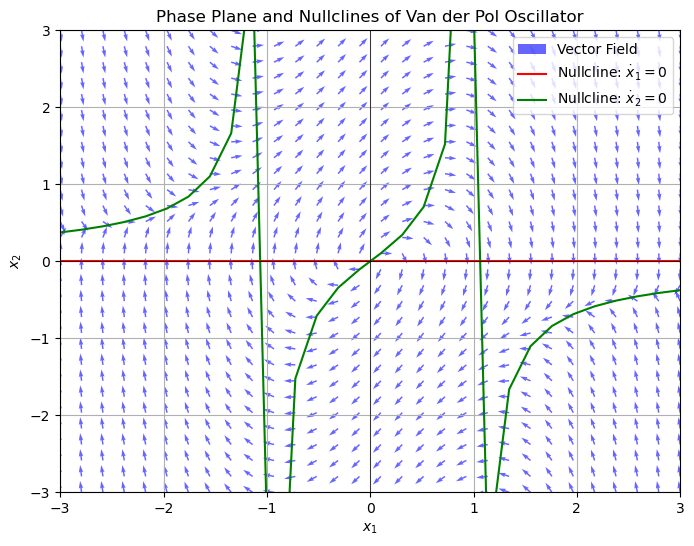

In [15]:
# Define the Van der Pol system
def van_der_pol(X, C, omega):
    x1, x2 = X
    dx1 = x2
    dx2 = -omega**2 * x1 - C * (x1**2 - 1) * x2
    return np.array([dx1, dx2])

# Define the nullclines
def nullcline1(x1):
    return np.zeros_like(x1)  # x2 = 0

def nullcline2(x1, C, omega):
    return -omega**2 * x1 / (C * (x1**2 - 1) + 1e-5)  # Prevent division by zero

# Parameters for the system
C = 1  # Damping parameter
omega = 1  # Frequency parameter

# Define the grid for the phase plane
x1_range = np.linspace(-3, 3, 30)
x2_range = np.linspace(-3, 3, 30)
X1, X2 = np.meshgrid(x1_range, x2_range)
DX1, DX2 = np.zeros_like(X1), np.zeros_like(X2)

# Compute the vector field
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        dx = van_der_pol([X1[i, j], X2[i, j]], C, omega)
        DX1[i, j], DX2[i, j] = dx / np.linalg.norm(dx) if np.linalg.norm(dx) > 0 else (0, 0)

# Plot the phase plane and nullclines
plt.figure(figsize=(8, 6))
plt.quiver(X1, X2, DX1, DX2, color='blue', alpha=0.6, label='Vector Field')
plt.plot(x1_range, nullcline1(x1_range), 'r-', label='Nullcline: $\\dot{x}_1 = 0$')
plt.plot(x1_range, nullcline2(x1_range, C, omega), 'g-', label='Nullcline: $\\dot{x}_2 = 0$')
plt.title("Phase Plane and Nullclines of Van der Pol Oscillator")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()
plt.show()


## Assignment 2b

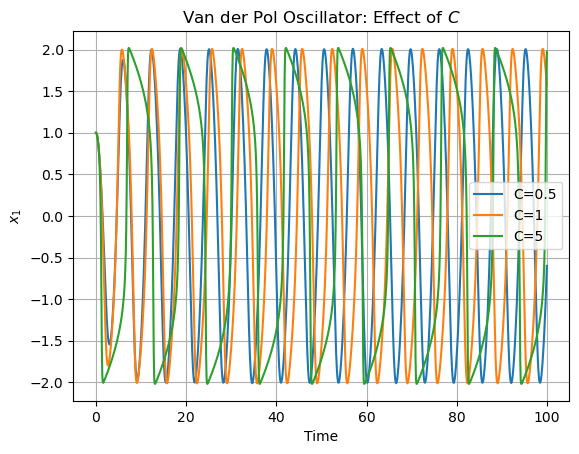

Results for varying C (omega = 1):
C         Amplitude      Frequency      Transient Duration  
0.5       2.00712        0.31349        5.80581             
1         2.00928        0.30022        5.40541             
5         2.01901        0.17242        1.40140             


In [3]:
from scipy.integrate import solve_ivp

# Define the Van der Pol oscillator for simulation
def van_der_pol_ode(t, X, C, omega):
    x1, x2 = X
    dx1 = x2
    dx2 = -omega**2 * x1 - C * (x1**2 - 1) * x2
    return [dx1, dx2]

# Function to simulate the Van der Pol oscillator and extract amplitude, frequency, and transient duration
def simulate_van_der_pol(C, omega, t_span, X0):
    # Solve the ODE
    solution = solve_ivp(van_der_pol_ode, t_span, X0, args=(C, omega), t_eval=np.linspace(t_span[0], t_span[1], 1000))
    
    # Extract solution components
    t = solution.t
    x1 = solution.y[0]  # x1 corresponds to position

    # Amplitude: Approximate as the max of x1 in the steady state
    amplitude = np.max(x1[-200:])  # Last 200 points as steady-state approximation

    # Frequency: Estimate from zero crossings of x1
    zero_crossings = np.where(np.diff(np.sign(x1)))[0]
    if len(zero_crossings) > 1:
        periods = np.diff(t[zero_crossings])  # Time differences between crossings
        frequency = 1 / np.mean(periods)  # Average frequency
    else:
        frequency = None  # Not enough crossings to estimate

    # Transient duration: Time taken for |x1| to settle within 10% of the final amplitude
    threshold = 0.1 * amplitude
    transient_duration = next((time for time, value in zip(t, np.abs(x1)) if value >= amplitude - threshold), None)

    return t, x1, amplitude, frequency, transient_duration

# Parameters for simulation
t_span = (0, 100)  # Time range for simulation
X0 = [1.0, 0.0]  # Initial conditions

# Analyze for varying C and fixed omega
C_values = [0.5, 1, 5]
omega = 1  # Fixed omega

results = []
for C in C_values:
    t, x1, amplitude, frequency, transient_duration = simulate_van_der_pol(C, omega, t_span, X0)
    results.append((C, amplitude, frequency, transient_duration))
    plt.plot(t, x1, label=f'C={C}')

# Plotting results
plt.title("Van der Pol Oscillator: Effect of $C$")
plt.xlabel("Time")
plt.ylabel("$x_1$")
plt.legend()
plt.grid()
plt.show()

# Displaying results
print("Results for varying C (omega = 1):")
print(f"{'C':<10}{'Amplitude':<15}{'Frequency':<15}{'Transient Duration':<20}")
for C, amplitude, frequency, transient_duration in results:
    print(f"{C:<10}{amplitude:<15.5f}{frequency if frequency else 'N/A':<15.5f}{transient_duration:<20.5f}")


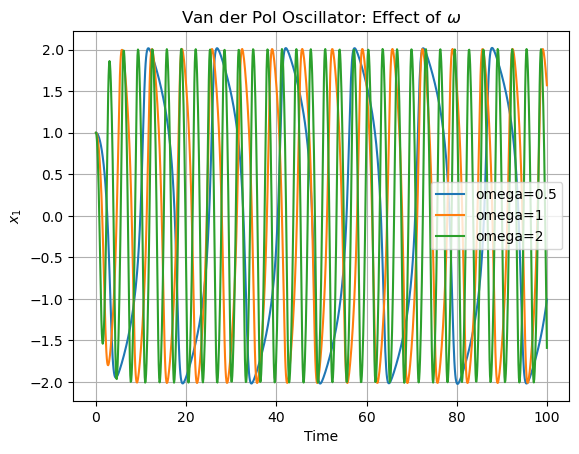

Results for varying omega (C = 1):
omega     Amplitude      Frequency      Transient Duration  
0.5       2.02199        0.13159        3.90390             
1         2.00928        0.30022        5.40541             
2         2.00918        0.62690        2.90290             


In [4]:
# Analyze for varying omega and fixed C
C = 1  # Fixed C
omega_values = [0.5, 1, 2]

results_omega = []
for omega in omega_values:
    t, x1, amplitude, frequency, transient_duration = simulate_van_der_pol(C, omega, t_span, X0)
    results_omega.append((omega, amplitude, frequency, transient_duration))
    plt.plot(t, x1, label=f'omega={omega}')

# Plotting results
plt.title("Van der Pol Oscillator: Effect of $\\omega$")
plt.xlabel("Time")
plt.ylabel("$x_1$")
plt.legend()
plt.grid()
plt.show()

# Displaying results
print("Results for varying omega (C = 1):")
print(f"{'omega':<10}{'Amplitude':<15}{'Frequency':<15}{'Transient Duration':<20}")
for omega, amplitude, frequency, transient_duration in results_omega:
    print(f"{omega:<10}{amplitude:<15.5f}{frequency if frequency else 'N/A':<15.5f}{transient_duration:<20.5f}")


## Assignment 3

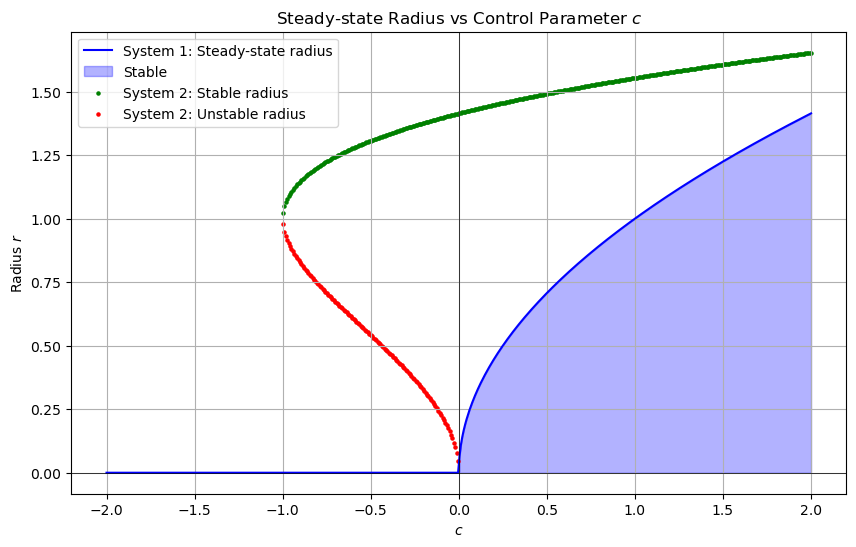

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# System 1: dr/dt = r(c - r^2)
def system1_steady_state(c):
    # Steady-state solutions (r^2 = c)
    if c >= 0:
        return np.sqrt(c), True  # Stable for c > 0
    return 0, False  # No steady-state for c < 0

# System 2: dr/dt = r(c + 2r^2 - r^4)
def system2_steady_state(c):
    # Solve for r^4 - 2r^2 - c = 0
    coefficients = [1, 0, -2, 0, -c]
    roots = np.roots(coefficients)
    real_roots = [r.real for r in roots if np.isreal(r) and r.real >= 0]  # Only positive real roots
    return real_roots

# Range of control parameter c
c_values = np.linspace(-2, 2, 500)

# Steady-state solutions for System 1
r_system1 = [system1_steady_state(c)[0] for c in c_values]
stability_system1 = [system1_steady_state(c)[1] for c in c_values]

# Steady-state solutions for System 2
r_system2_stable = []
r_system2_unstable = []

for c in c_values:
    roots = system2_steady_state(c)
    for r in roots:
        if r < 1:  # Approximation: Assume stability depends on |r| < 1 (subcritical bifurcation behavior)
            r_system2_unstable.append((c, r))
        else:
            r_system2_stable.append((c, r))

# Plotting results for System 1
plt.figure(figsize=(10, 6))
plt.plot(c_values, r_system1, label="System 1: Steady-state radius", color="blue")
plt.fill_between(c_values, 0, r_system1, where=stability_system1, color="blue", alpha=0.3, label="Stable")

# Plotting results for System 2
if r_system2_stable:
    c_stable, r_stable = zip(*r_system2_stable)
    plt.scatter(c_stable, r_stable, color="green", s=5, label="System 2: Stable radius")
if r_system2_unstable:
    c_unstable, r_unstable = zip(*r_system2_unstable)
    plt.scatter(c_unstable, r_unstable, color="red", s=5, label="System 2: Unstable radius")

# Plot aesthetics
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("Steady-state Radius vs Control Parameter $c$")
plt.xlabel("$c$")
plt.ylabel("Radius $r$")
plt.legend()
plt.grid()
plt.show()